In [2]:
# Selecting important feature for the delay of the airplan
import pandas as pd
import numpy as np

In [2]:
data_1 = pd.read_csv("data_20080.csv")
data_2 = pd.read_csv("data_2008.csv")

In [3]:
data_1.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'ORIGIN_AIRPORT_ID',
       'DEST_AIRPORT_ID', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DEL15', 'CRS_ELAPSED_TIME', 'DISTANCE', 'Unnamed: 11'],
      dtype='object')

In [4]:
data_1.corr()['ARR_DEL15']

DAY_OF_MONTH        -0.135256
DAY_OF_WEEK         -0.060115
ORIGIN_AIRPORT_ID   -0.013488
DEST_AIRPORT_ID      0.004197
CRS_DEP_TIME         0.067446
CRS_ARR_TIME         0.063619
ARR_TIME             0.061020
ARR_DEL15            1.000000
CRS_ELAPSED_TIME    -0.028880
DISTANCE            -0.030695
Unnamed: 11               NaN
Name: ARR_DEL15, dtype: float64

# Define the Target 

Target could be ARR_DELAY  OR ARR_DEl15

If we take ARR_DELAY as the target it is a regression problem 

if we take ARR_DEl15 as a target is a classification problem

of course we can treate it as Regression then transfer it to classification problem 

But for now i'll deal with it as it is a classification problem and see what we got.


# Task 1 

1- Using January Year 2018 data, apply the Decision Tree method to predict flight delay based on the most important variables, use N-Fold Cross Validation (N >= 20) and Confusion Matrix to evaluate and select best possible model with the shortest possible tree. Provide evidence of variables importance and justify your variables selection. (Code: 25 points - Explanation: 25 points)

# Classification approach (Preparing Data)


In [5]:
data_1.drop(['Unnamed: 11'],axis = 1 , inplace = True)

In [6]:
data_1.corr()['ARR_DEL15']

DAY_OF_MONTH        -0.135256
DAY_OF_WEEK         -0.060115
ORIGIN_AIRPORT_ID   -0.013488
DEST_AIRPORT_ID      0.004197
CRS_DEP_TIME         0.067446
CRS_ARR_TIME         0.063619
ARR_TIME             0.061020
ARR_DEL15            1.000000
CRS_ELAPSED_TIME    -0.028880
DISTANCE            -0.030695
Name: ARR_DEL15, dtype: float64

# Justifying my choice 



I choosed this variables as it is the most logical variables to ask from the user from my point of view and it also appears that it has relative relation to the target (ARR_DEl15)

In [8]:
data_1.corr()['ARR_DEL15']

DAY_OF_MONTH        -0.135256
DAY_OF_WEEK         -0.060115
ORIGIN_AIRPORT_ID   -0.013488
DEST_AIRPORT_ID      0.004197
CRS_DEP_TIME         0.067446
CRS_ARR_TIME         0.063619
ARR_TIME             0.061020
ARR_DEL15            1.000000
CRS_ELAPSED_TIME    -0.028880
DISTANCE            -0.030695
Name: ARR_DEL15, dtype: float64

In [9]:
target_col = data_1['ARR_DEL15']
target_col2 = data_1['ARR_TIME']

In [10]:
data_1.drop(['ARR_DEL15','ARR_TIME','FL_DATE'],axis = 1 , inplace = True)

In [12]:
data = pd.concat([data_1,target_col],axis=1)

In [13]:
data = data.dropna()

In [16]:
from sklearn.utils import shuffle
data = shuffle(data, random_state=45)

In [17]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

In [22]:
print("The accuracy of decision tree in predicting whether the fligh would be late or not is :\n",acc)

The accuracy of decision tree in predicting whether the fligh would be late or not is :
 0.753281925328949


In [23]:
print(clf.tree_.max_depth)

49


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
        
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  


# fitting trees of depth 5 to 30
sm_tree_depths = range(5,30)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)



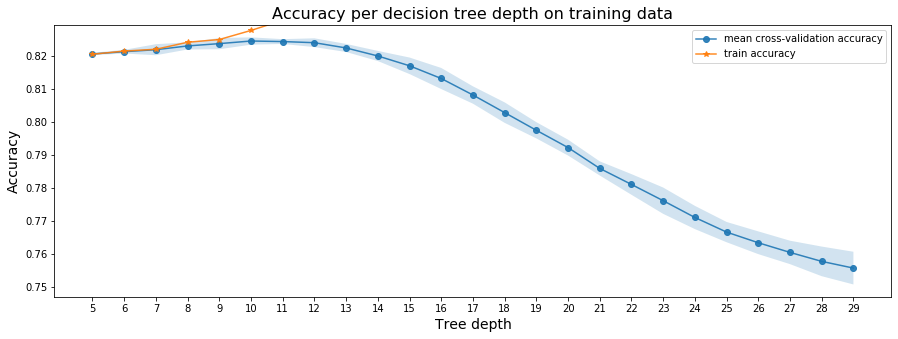

In [25]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
    
    
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')    

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
        
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  


# fitting trees of depth 5 to 30
sm_tree_depths = range(5,30)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)




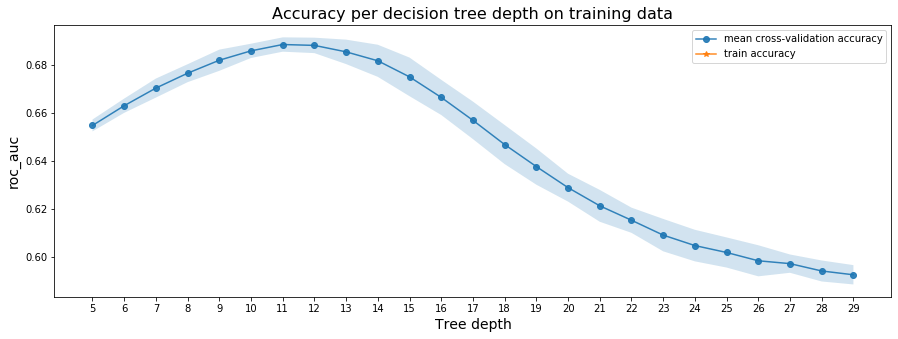

In [27]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('roc_auc', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
    
    
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')    

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
clf2 = tree.DecisionTreeClassifier(max_depth=13)
clf2 = clf2.fit(X_train, y_train)
y_pred2= clf2.predict(X_test)
acc = accuracy_score(y_test, y_pred2)


In [29]:
acc

0.8230155888301065

wow this is actually work Great!
the tree was built for the whole data was so deep that it affects the accuracy making the model go through alot of decisions
it has depth : 47 
while when i apply k fold with N = 25 from 5 to 30 
i found that may be we don't need that deep i hold that thought and try to train the whole data with tree that has maximum depth as just 10 
and it actually improves the accuracy from 0.753281925328949 to 0.8230155888301065

Awesome! 

Now let's check to see the cofucsion matrix for that tree then we can discover the confusion matrix for other trees


In [30]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf2, X, y, cv=10)
scores

array([0.82698133, 0.82491762, 0.82548347, 0.82714775, 0.82688147,
       0.8269314 , 0.82453483, 0.82504785, 0.82632937, 0.82449863])

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[159449,   3222],
       [ 31878,   3734]])

In [32]:
from sklearn.metrics import recall_score
print("recall DT " , recall_score(y_test, y_pred2, average='macro'))
from sklearn.metrics import precision_score
print("precision DT " , precision_score(y_test, y_pred2, average='macro'))
from sklearn.metrics import f1_score
print("f1 score DT " ,f1_score(y_test, y_pred2, average='macro'))

recall DT  0.5425227237854232
precision DT  0.6850937444849072
f1 score DT  0.5381419226911074


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.692


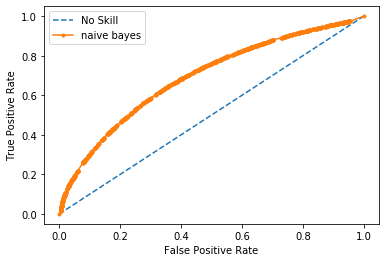

In [33]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
# predict probabilities
lr_probs = clf2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='naive bayes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# My comment 


As we can see recall and f1 score are very low in this model which means this model can not classify false negative correctly it will always be biased towards that the plan will be late.


# Descritizing Delays to 6 groups :

In [34]:
data = pd.read_csv("data_2008arr.csv")
data.drop(['Unnamed: 9'],axis = 1 , inplace = True)
data.dropna(inplace= True)
target_col2 = data['ARR_DELAY']

In [35]:
data

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,1,1,10994,10397,1850,2014,-12.0,84.0,259.0
1,1,1,11433,11995,2012,2217,-1.0,125.0,460.0
2,1,1,12953,15096,1125,1246,-23.0,81.0,198.0
3,1,1,13485,12953,1200,1518,85.0,138.0,812.0
4,1,1,11433,10423,821,1104,-36.0,223.0,1149.0
...,...,...,...,...,...,...,...,...,...
621456,31,3,10868,12264,1455,1625,-18.0,90.0,401.0
621457,31,3,10408,13930,1037,1145,-21.0,68.0,160.0
621458,31,3,13930,15412,1350,1630,-19.0,100.0,475.0
621459,31,3,10408,13930,815,931,-10.0,76.0,160.0


In [24]:
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [25]:
data.drop(['ARR_DELAY'],axis =1 , inplace= True)

In [26]:
data = pd.concat([data,target_col2],axis = 1)


In [27]:
data = shuffle(data, random_state=45)

In [28]:
# removing negative delays 
def remove_negative(Str):
    if Str <= 0 :
        return 0
    elif Str > 0 and Str <= 20 :
        return 1
    elif Str > 20 and Str <= 40 : 
        return 2
    elif Str > 40 and Str <= 60 :
        return 3
    elif Str > 60 and Str <= 90 :
        return 4 
    elif Str > 90 and Str < 120 :
        return 5
    else:
        return 6
data['ARR_DELAY']= data['ARR_DELAY'].apply(remove_negative)    

In [29]:
max(data.dropna().iloc[:,-1])

6

In [30]:
X = data.dropna().iloc[:,:-1].values
y = data.dropna().iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
clf = tree.DecisionTreeClassifier(max_depth=9)
clf = clf.fit(X_train, y_train)

In [32]:
y_pred3 = clf.predict(X_test)

In [33]:
accuracy_score(y_pred3,y_test)

0.6734717550168194

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
        
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  


# fitting trees of depth 5 to 30
sm_tree_depths = range(5,30)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)




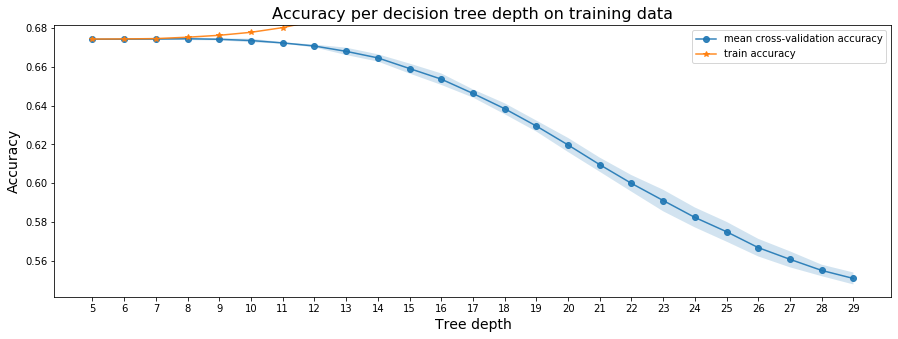

In [71]:
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()
    
    
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')    

In [15]:
df = pd.DataFrame(y_pred3,columns =['predictions']) 

In [16]:

data_test = pd.DataFrame(X_test ,columns =['DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','CRS_DEP_TIME','CRS_ARR_TIME','CRS_ELAPSED_TIME','DISTANCE']) 



In [17]:
y_data_test = pd.DataFrame(y_test,columns=['Actual'])


In [18]:
pd.concat([data_test,y_data_test,df],axis = 1 )

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,Actual,predictions
0,29.0,1.0,13871.0,13232.0,1545.0,1705.0,80.0,423.0,0,0
1,19.0,5.0,10821.0,10423.0,1925.0,2210.0,225.0,1342.0,0,0
2,14.0,7.0,11697.0,14492.0,1156.0,1406.0,130.0,680.0,0,0
3,8.0,1.0,14100.0,13487.0,1055.0,1301.0,186.0,980.0,5,0
4,15.0,1.0,10721.0,15016.0,1805.0,2020.0,195.0,1047.0,2,0
...,...,...,...,...,...,...,...,...,...,...
198278,1.0,1.0,12954.0,14893.0,700.0,830.0,90.0,387.0,0,0
198279,25.0,4.0,10721.0,14100.0,645.0,825.0,100.0,280.0,0,0
198280,25.0,4.0,11057.0,10431.0,1439.0,1528.0,49.0,91.0,2,0
198281,5.0,5.0,11193.0,14082.0,1222.0,1440.0,138.0,850.0,0,0


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred3)

from sklearn.metrics import recall_score
print("recall DT " , recall_score(y_test, y_pred3, average='macro'))
from sklearn.metrics import precision_score
print("precision DT " , precision_score(y_test, y_pred3, average='macro'))
from sklearn.metrics import f1_score
print("f1 score DT " ,f1_score(y_test, y_pred3, average='macro'))





recall DT  0.15185837070604605
precision DT  0.23888246078907777
f1 score DT  0.1322735490349872


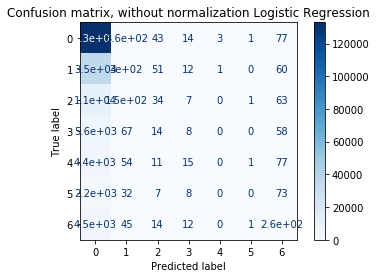

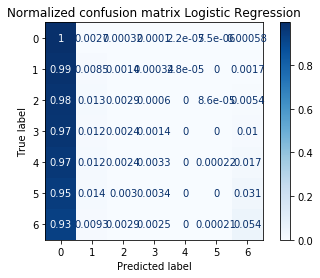

In [83]:
# Great Finally Having  reasonable accuracy with resonable confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization Logistic Regression", None),
                  ("Normalized confusion matrix Logistic Regression", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=[0,1,2,3,4,5,6],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)

plt.show()



# Task 2 

2- Using January Year 2018 data,  apply Random Forests method using Bagging (Number of trees = N as of Task #1) for the same as Task #1. Compare developed model with the best model selected in Task #1. (Code: 15 points - Explanation: 15 points)



In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split 


data = pd.read_csv("data_2008arr.csv")
data.drop(['Unnamed: 9'],axis = 1 , inplace = True)
data.dropna(inplace= True)
target_col2 = data['ARR_DELAY']

data.drop(['ARR_DELAY'],axis =1 , inplace= True)
data = pd.concat([data,target_col2],axis = 1)
data = shuffle(data, random_state=45)

# removing negative delays 
def remove_negative(Str):
    if Str <= 0 :
        return 0
    elif Str > 0 and Str <= 20 :
        return 1
    elif Str > 20 and Str <= 40 : 
        return 2
    elif Str > 40 and Str <= 60 :
        return 3
    elif Str > 60 and Str <= 90 :
        return 4 
    elif Str > 90 and Str < 120 :
        return 5
    else:
        return 6
data['ARR_DELAY']= data['ARR_DELAY'].apply(remove_negative)    
X = data.dropna().iloc[:,:-1].values
y = data.dropna().iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42 , max_depth = 9),max_samples=0.5, max_features=0.6)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[133428      0      0      0      0      0      0]
 [ 35729      0      0      0      0      0      0]
 [ 11668      0      0      0      0      0      0]
 [  5781      0      0      0      0      0      0]
 [  4517      0      0      0      0      0      0]
 [  2336      0      0      0      0      0      0]
 [  4824      0      0      0      0      0      0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80    133428
           1       0.00      0.00      0.00     35729
           2       0.00      0.00      0.00     11668
           3       0.00      0.00      0.00      5781
           4       0.00      0.00      0.00      4517
           5       0.00      0.00      0.00      2336
           6       0.00      0.00      0.00      4824

    accuracy                           0.67    198283
   macro avg       0.10      0.14      0.11    198283
weighted avg       0.45      0.67      0.54    198283

0.6729169923795787


/Users/macbook55/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
confusion_matrix(y_test, y_pred)

array([[133428,      0,      0,      0,      0,      0,      0],
       [ 35729,      0,      0,      0,      0,      0,      0],
       [ 11668,      0,      0,      0,      0,      0,      0],
       [  5781,      0,      0,      0,      0,      0,      0],
       [  4517,      0,      0,      0,      0,      0,      0],
       [  2336,      0,      0,      0,      0,      0,      0],
       [  4824,      0,      0,      0,      0,      0,      0]])

In [21]:
from sklearn.metrics import recall_score
print("recall RF " , recall_score(y_test, y_pred, average='macro'))
from sklearn.metrics import precision_score
print("precision RF " , precision_score(y_test, y_pred, average='macro'))
from sklearn.metrics import f1_score
print("f1 score RF " ,f1_score(y_test, y_pred, average='macro'))



recall RF  0.14285714285714285
precision RF  0.09613099891136838
f1 score RF  0.11492620297272539


/Users/macbook55/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparing part


However they basically have the same accuracy they are slightly different 

| comparison field | Decision Tree withKfold   | Random Forest with Bagging |
| --- | --- | --- |
| precision | 0.2388 | 0.096 |
| accuracy | 0.6734 | 0.6729 |
| recall | 0.1518 | 0.142 |
| f1 | 0.132 | 0.114|


I think the the two models are alike very much 
however we know that random forest is better in handling data with alot of dimensions as it doesn't use all dimensions it just use little of them and still get the same accuracy we get by optimizing Decision Tree model. 


Of course they some real small difference in precision f1 and recall but at the end of the day they are almost the same model.

The experience i got from applying these two models was huge specially in the decision tree part. 


It was quite interesting to me that decision tree take depths more than it really need for the accuracy to be the most for example the original model got depths almost 29 however the best model only need depth 9.

# Task 3 

3- Validate the two models selected on tasks #1 and #2 on the data of January Year 2019 and explain in details the model performance of both of them on that month. (Code: 10 points - Explanation: 20 points)



In [41]:
data = pd.read_csv("data_2009.csv")
data


,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,Unnamed: 9
0,1,2,13577,11057,2157,2311,-3.0,74.0,157.0,NaN
1,1,2,10529,11278,1151,1325,6.0,94.0,313.0,NaN
2,1,2,11278,10529,1009,1126,14.0,77.0,313.0,NaN
3,1,2,11278,11996,2000,2134,-12.0,94.0,396.0,NaN
4,1,2,13931,11057,1215,1347,-14.0,92.0,290.0,NaN
...,...,...,...,...,...,...,...,...,...,...
638644,31,4,11057,11624,1425,1640,-1.0,135.0,736.0,NaN
638645,31,4,11624,11057,1710,1921,-7.0,131.0,736.0,NaN
638646,31,4,11278,12339,2205,2357,2.0,112.0,500.0,NaN
638647,31,4,14100,14122,1749,1913,-13.0,84.0,268.0,NaN


In [42]:
data.drop(['Unnamed: 9'],axis = 1 , inplace = True)
data.dropna(inplace= True)
target_col2 = data['ARR_DELAY']

data.drop(['ARR_DELAY'],axis =1 , inplace= True)
data = pd.concat([data,target_col2],axis = 1)
data = shuffle(data, random_state=45)

# removing negative delays 
def remove_negative(Str):
    if Str <= 0 :
        return 0
    elif Str > 0 and Str <= 20 :
        return 1
    elif Str > 20 and Str <= 40 : 
        return 2
    elif Str > 40 and Str <= 60 :
        return 3
    elif Str > 60 and Str <= 90 :
        return 4 
    elif Str > 90 and Str < 120 :
        return 5
    else:
        return 6
data['ARR_DELAY']= data['ARR_DELAY'].apply(remove_negative)    
X = data.dropna().iloc[:,:-1].values
y = data.dropna().iloc[:,-1].values




In [47]:
data

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,DISTANCE,ARR_DELAY
582277,29,2,13495,11259,635,805,90.0,436.0,0
25842,2,3,11057,15412,920,1026,66.0,177.0,0
390480,19,6,10821,10721,530,654,84.0,369.0,6
208589,10,4,12889,14679,831,939,68.0,258.0,1
190234,10,4,11995,13930,1330,1443,133.0,589.0,0
...,...,...,...,...,...,...,...,...,...
393554,20,7,13244,12953,955,1330,155.0,963.0,1
589354,29,2,14057,13487,650,1202,192.0,1426.0,0
626140,31,4,12892,11618,1615,34,319.0,2454.0,1
408062,20,7,14057,14107,1055,1429,154.0,1009.0,0


In [51]:
y_pred_DT = clf.predict(X)
print(confusion_matrix(y,y_pred_DT))
print(classification_report(y,y_pred_DT))
print(accuracy_score(y, y_pred_DT))

print(multilabel_confusion_matrix(y, y_pred_DT,labels=[0,1,2,3,4,5,6]))

[[400659   1733    418      4      5     12   1590]
 [115815    782    107      1      0      4    590]
 [ 38261    260     31      0      0      2    160]
 [ 18084    101     11      0      0      2     54]
 [ 14545     62      4      0      0      0     39]
 [  7960     36      4      0      0      0     17]
 [ 16217     45      4      0      1      0     29]]
              precision    recall  f1-score   support

           0       0.66      0.99      0.79    404421
           1       0.26      0.01      0.01    117299
           2       0.05      0.00      0.00     38714
           3       0.00      0.00      0.00     18252
           4       0.00      0.00      0.00     14650
           5       0.00      0.00      0.00      8017
           6       0.01      0.00      0.00     16296

    accuracy                           0.65    617649
   macro avg       0.14      0.14      0.12    617649
weighted avg       0.48      0.65      0.52    617649

0.6500471950897678
[[[  2346 210882]
 

In [50]:
y_pred_RF = bagging.predict(X)
print(confusion_matrix(y,y_pred_RF))
print(classification_report(y,y_pred_RF))
print(accuracy_score(y, y_pred_RF))

from sklearn.metrics import multilabel_confusion_matrix
print(multilabel_confusion_matrix(y, y_pred_RF,labels=[0,1,2,3,4,5,6]))




[[404421      0      0      0      0      0      0]
 [117299      0      0      0      0      0      0]
 [ 38714      0      0      0      0      0      0]
 [ 18252      0      0      0      0      0      0]
 [ 14650      0      0      0      0      0      0]
 [  8017      0      0      0      0      0      0]
 [ 16296      0      0      0      0      0      0]]


/Users/macbook55/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.65      1.00      0.79    404421
           1       0.00      0.00      0.00    117299
           2       0.00      0.00      0.00     38714
           3       0.00      0.00      0.00     18252
           4       0.00      0.00      0.00     14650
           5       0.00      0.00      0.00      8017
           6       0.00      0.00      0.00     16296

    accuracy                           0.65    617649
   macro avg       0.09      0.14      0.11    617649
weighted avg       0.43      0.65      0.52    617649

0.6547747992792022
[[[     0 213228]
  [     0 404421]]

 [[500350      0]
  [117299      0]]

 [[578935      0]
  [ 38714      0]]

 [[599397      0]
  [ 18252      0]]

 [[602999      0]
  [ 14650      0]]

 [[609632      0]
  [  8017      0]]

 [[601353      0]
  [ 16296      0]]]


# Comparing two models with 2019 data


From my point of view looks like the two models are very alike but when testing new data still random forest go slightly more accurate than optimized Decision Tree.

However confusion matrix of optimized Decision tree is way better than random forest 


| comparison field | Decision Tree withKfold   | Random Forest with Bagging |
| --- | --- | --- |
| precision | 0.14 | 0.09 |
| accuracy | 0.650 | 0.654 |
| recall | 0.14 | 0.14 |
| f1 | 0.12 | 0.11|



let's explain how each one behave according to every confusion matrix we got 


- Decision Tree confusion matrix vs Random Forest confusion matrix 



| comparison field | Decision Tree withKfold   | Random Forest with Bagging |
| --- | --- | --- |
| label 0  | [[[  2346 210882] [  3762 400659]] | [[     0 213228][     0 404421]] |
| label 1 <20 minutes>  | [[498113   2237] [116517    782]] |[[500350      0][117299      0]] |
| label 2  <40 minutes> |  [[578387    548][ 38683     31]] |[[578935      0][ 38714      0]] |
| label 3  <60 minutes> |  [[599392      5][ 18252      0]] |[[599397      0][ 18252      0]]|
| label 4  <90 minutes> |  [[602993      6][ 14650      0]] |[[602999      0][ 14650      0]]|
| label 5  <120 minutes>|  [[609612     20][  8017      0]]|[[609632      0][  8017      0]]|
| label 6  <more than 120 minutes>|  [[598903   2450][ 16267     29]]] |[[601353      0][ 16296      0]]]|


from the first look we can detict that random forest is biased to the negativity in all labels except for label 0 
However Decision tree model seems to have opinion and faults in each label 
i thought that i did something wrong with random forest but turns out that it is because of the nature of the model i guess.



  

 

# Concolusion


Both models almost behaves the same however decision tree seems to be better in classifing multiple labels with resonable results and resonable mistakes
This was everything i guess and i would be happy to take your comments if you have any


1